In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [2]:
spotify_data_df = pd.read_csv("../Resources/spotify-2023.csv", encoding='latin-1')
spotify_data_df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [3]:
genre_df = pd.read_csv("../Resources/all_data_genre.csv", encoding = "Latin-1")
genre_df.head(5)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,Deezer Album ID,Deezer Genre
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,Major,80,89,83,31,0,8,4,463574485,Asian Music
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,Major,71,61,74,7,0,10,4,410083687,Rap/Hip Hop
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,Major,51,32,53,17,0,31,6,484372295,Pop
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,Major,55,58,72,11,0,11,15,108447472,Pop
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,Minor,65,23,80,14,63,11,6,442984025,Latin Music


In [4]:
sp_df = spotify_data_df.dropna()
sp_df.tail()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5
952,Alone,Burna Boy,1,2022,11,4,782,2,96007391,27,...,90,E,Minor,61,32,67,15,0,11,5


In [5]:
merged_data = pd.merge(sp_df, genre_df, how ="left", on = "track_name")
merged_data.tail()

,track_name,artist(s)_name_x,artist_count_x,released_year_x,released_month_x,released_day_x,in_spotify_playlists_x,in_spotify_charts_x,streams_x,in_apple_playlists_x,...,mode_y,danceability_%_y,valence_%_y,energy_%_y,acousticness_%_y,instrumentalness_%_y,liveness_%_y,speechiness_%_y,Deezer Album ID,Deezer Genre
824,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,Major,60,24,39,57,0,8,3,372408897,Pop
825,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,Major,42,7,24,83,1,12,6,368506677,Pop
826,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,Major,80,81,67,4,0,8,6,382808197,Pop
827,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,Major,82,67,77,8,0,12,5,367159307,Rap/Hip Hop
828,Alone,Burna Boy,1,2022,11,4,782,2,96007391,27,...,Minor,61,32,67,15,0,11,5,373539777,Films/Games


In [6]:
reduced_data = merged_data[["track_name", "artist(s)_name_x", "in_spotify_charts_x",
                            "in_apple_charts_x", "in_deezer_charts_x", "key_y",
                            "bpm_y", "Deezer Genre", "mode_y"]]
reduced_data.tail()

,track_name,artist(s)_name_x,in_spotify_charts_x,in_apple_charts_x,in_deezer_charts_x,key_y,bpm_y,Deezer Genre,mode_y
824,My Mind & Me,Selena Gomez,0,13,1,A,144,Pop,Major
825,Bigger Than The Whole Sky,Taylor Swift,0,0,0,F#,166,Pop,Major
826,A Veces (feat. Feid),"Feid, Paulo Londra",0,0,0,C#,92,Pop,Major
827,En La De Ella,"Feid, Sech, Jhayco",0,26,0,C#,97,Rap/Hip Hop,Major
828,Alone,Burna Boy,2,18,1,E,90,Films/Games,Minor


In [7]:
reduced_data.dropna()

,track_name,artist(s)_name_x,in_spotify_charts_x,in_apple_charts_x,in_deezer_charts_x,key_y,bpm_y,Deezer Genre,mode_y
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",147,263,10,B,125,Asian Music,Major
1,LALA,Myke Towers,48,126,14,C#,92,Rap/Hip Hop,Major
2,vampire,Olivia Rodrigo,113,207,14,F,138,Pop,Major
3,Cruel Summer,Taylor Swift,100,207,12,A,170,Pop,Major
4,WHERE SHE GOES,Bad Bunny,50,133,15,A,144,Latin Music,Minor
...,...,...,...,...,...,...,...,...,...
824,My Mind & Me,Selena Gomez,0,13,1,A,144,Pop,Major
825,Bigger Than The Whole Sky,Taylor Swift,0,0,0,F#,166,Pop,Major
826,A Veces (feat. Feid),"Feid, Paulo Londra",0,0,0,C#,92,Pop,Major
827,En La De Ella,"Feid, Sech, Jhayco",0,26,0,C#,97,Rap/Hip Hop,Major


In [8]:
track_name = reduced_data["track_name"]
track_name
artist_name = reduced_data["artist(s)_name_x"]
key = reduced_data["key_y"]
bpm = reduced_data["bpm_y"]
genre = reduced_data["Deezer Genre"]
mode= reduced_data["mode_y"]

In [9]:
spotify_chart = pd.to_numeric(reduced_data["in_spotify_charts_x"])
spotify_chart

apple_chart= pd.to_numeric(reduced_data["in_apple_charts_x"])
apple_chart

deezer_chart = pd.to_numeric(reduced_data["in_deezer_charts_x"])
deezer_chart

0      10
1      14
2      14
3      12
4      15
       ..
824     1
825     0
826     0
827     0
828     1
Name: in_deezer_charts_x, Length: 829, dtype: int64

In [10]:
df_2 = pd.DataFrame()

df_2["Track Name"] = track_name
df_2["Artist(s) Name"] = artist_name
df_2["Spotify Chart Ranking"] = spotify_chart
df_2["Apple Chart Ranking"] = apple_chart
df_2["Deezer Chart Ranking"] = deezer_chart
df_2["Key"] = key
df_2["BPM"] = bpm
df_2["Genre"] = genre
df_2["Major/Minor"] = mode

df_2.head()

,Track Name,Artist(s) Name,Spotify Chart Ranking,Apple Chart Ranking,Deezer Chart Ranking,Key,BPM,Genre,Major/Minor
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",147,263,10,B,125,Asian Music,Major
1,LALA,Myke Towers,48,126,14,C#,92,Rap/Hip Hop,Major
2,vampire,Olivia Rodrigo,113,207,14,F,138,Pop,Major
3,Cruel Summer,Taylor Swift,100,207,12,A,170,Pop,Major
4,WHERE SHE GOES,Bad Bunny,50,133,15,A,144,Latin Music,Minor


In [11]:
df_3 = df_2.loc[df_2["Spotify Chart Ranking"] != 0]
# df_3

In [12]:
df_4 = df_3.loc[df_3["Apple Chart Ranking"] != 0]
# df_4

In [13]:
all_three_df = df_4.loc[df_4["Deezer Chart Ranking"] != 0]
all_three_df.head()

,Track Name,Artist(s) Name,Spotify Chart Ranking,Apple Chart Ranking,Deezer Chart Ranking,Key,BPM,Genre,Major/Minor
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",147,263,10,B,125,Asian Music,Major
1,LALA,Myke Towers,48,126,14,C#,92,Rap/Hip Hop,Major
2,vampire,Olivia Rodrigo,113,207,14,F,138,Pop,Major
3,Cruel Summer,Taylor Swift,100,207,12,A,170,Pop,Major
4,WHERE SHE GOES,Bad Bunny,50,133,15,A,144,Latin Music,Minor


In [14]:
duplicated_songs = all_three_df[all_three_df['Track Name'].duplicated(keep = False)]
duplicated_songs

,Track Name,Artist(s) Name,Spotify Chart Ranking,Apple Chart Ranking,Deezer Chart Ranking,Key,BPM,Genre,Major/Minor
292,Miss You,"Robin Schulz, Oliver Tree",10,16,3,F#,145,Dance,Minor
293,Miss You,"Robin Schulz, Oliver Tree",10,16,3,A,145,Dance,Major


In [15]:
final_df = all_three_df.drop_duplicates(subset=['Track Name'])
final_df.head()

,Track Name,Artist(s) Name,Spotify Chart Ranking,Apple Chart Ranking,Deezer Chart Ranking,Key,BPM,Genre,Major/Minor
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",147,263,10,B,125,Asian Music,Major
1,LALA,Myke Towers,48,126,14,C#,92,Rap/Hip Hop,Major
2,vampire,Olivia Rodrigo,113,207,14,F,138,Pop,Major
3,Cruel Summer,Taylor Swift,100,207,12,A,170,Pop,Major
4,WHERE SHE GOES,Bad Bunny,50,133,15,A,144,Latin Music,Minor


C#    37
F     36
G     34
B     29
D     26
G#    25
F#    24
E     20
A#    19
A     17
D#     9
Name: Key, dtype: int64


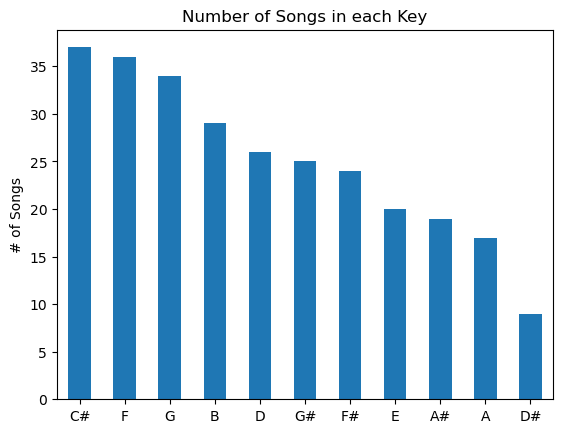

In [16]:
key_data = final_df["Key"].value_counts()
print(key_data)

key_data.plot.bar()
plt.title("Number of Songs in each Key")
plt.ylabel("# of Songs")
plt.xticks(rotation=0)
plt.savefig('../Output/key_fig.png')
plt.show()

In [17]:
mode_sum = final_df["Major/Minor"].value_counts()
mode_sum

Major    146
Minor    130
Name: Major/Minor, dtype: int64

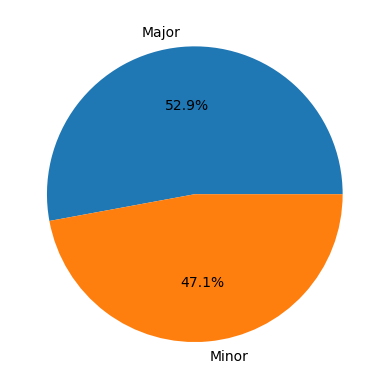

In [18]:
lables = ['minor', 'major']
plt.pie(mode_sum, autopct="%1.1f%%", labels = mode_sum.index)
plt.show()

In [19]:
bpm_data = final_df["BPM"].value_counts()
bpm_data
# bins =[49, 69, 89, 109, 129, 149, 169, 189, 209]
# group_names = ["50-69", "70-89", "90-109", "110-129", "130-149", "150-169", "170-189", "190-210",]


# final_df["BPM Groups"] = pd.cut(final_df["BPM"], bins, labels=group_names)
# final_df.head()
# #find ranges for BPM and group them

# bpm_groups = final_df['BPM Groups'].value_counts()
# bpm_groups

92     9
170    9
130    9
128    8
90     8
      ..
67     1
169    1
202    1
79     1
118    1
Name: BPM, Length: 99, dtype: int64

In [20]:
final_df_index = final_df.set_index("Track Name")
bpm_reg = final_df_index["BPM"].value_counts()
bpm_reg

bpm_df = pd.DataFrame()

bpm_df["Song Count"] = bpm_reg

bpm_df

,Song Count
92,9
170,9
130,9
128,8
90,8
...,...
67,1
169,1
202,1
79,1


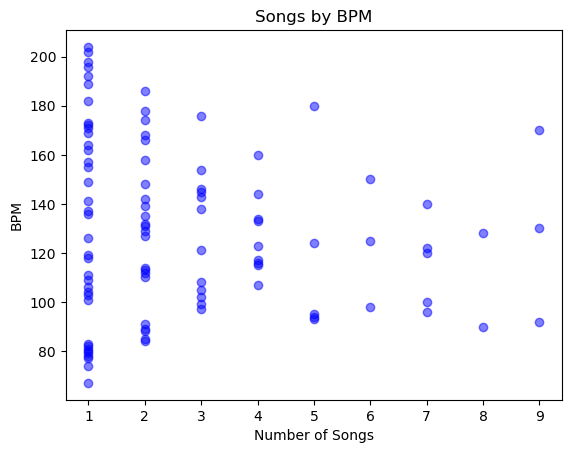

In [21]:
plt.scatter(bpm_data,  bpm_data.index, marker='o', color='blue', alpha=0.5)
plt.title('Songs by BPM')
plt.xlabel('Number of Songs')
plt.ylabel('BPM')
plt.savefig('../Output/bpm_fig.png')
plt.show()

y = -2.15x + 135.04


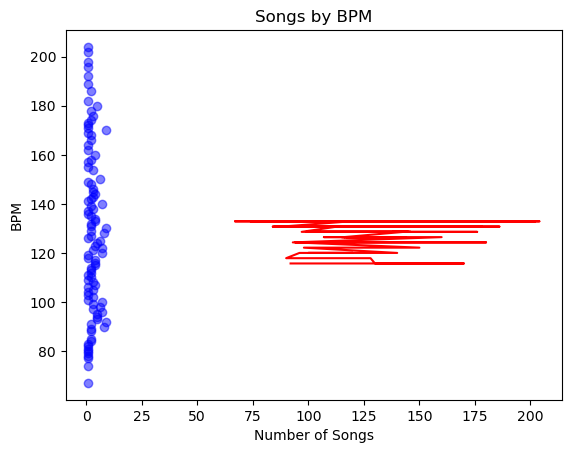

In [22]:
x_values= bpm_df["Song Count"]
y_values= bpm_df.index

plt.scatter(x_values, y_values, marker='o', color='blue', alpha=0.5)
plt.title('Songs by BPM')
plt.xlabel('Number of Songs')
plt.ylabel('BPM')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
    
plt.plot(regress_values,"r-")

In [23]:
genre_data = final_df["Genre"].value_counts()
genre_data

Pop                     53
Rap/Hip Hop             47
Latin Music             27
Alternative             20
Traditional Mexicano    14
Asian Music             12
R&B                     11
Reggaeton               10
Brazilian Music          8
Rock                     7
Dance                    6
Electro                  5
Country                  4
African Music            3
Singer & Songwriter      3
Classical                2
Films/Games              2
Cumbia                   1
Banda/Grupero            1
Name: Genre, dtype: int64

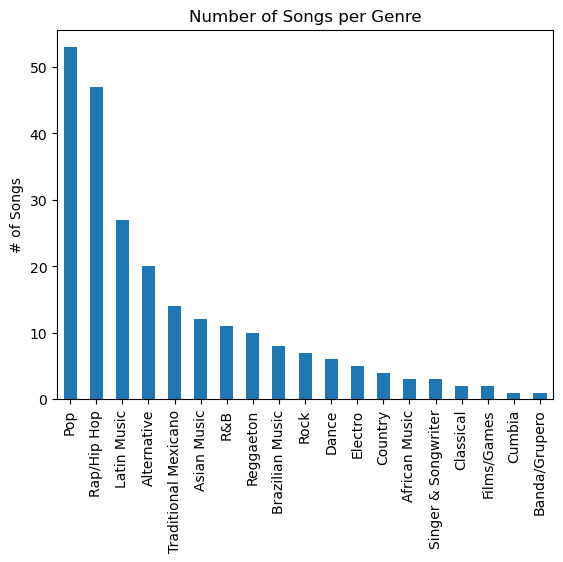

In [24]:
# genre_data.plot.pie(autopct= "%1.1f%%" ,pctdistance=1.1, labeldistance=1.2)
# plt.legend(bbox_to_anchor=(1.4, 1), loc='upper left')
# plt.show()

genre_data.plot.bar()
plt.ylabel("# of Songs")
plt.xticks(rotation= 90)
plt.title ("Number of Songs per Genre")
plt.savefig('../Output/genre_fig.png')
plt.show()


#format